In [1]:
import os
import sys
sys.path.append(os.path.abspath('../..'))
from data import SyntheticPV
from models import ApproximatePVLFM, ApproximateGP
from pv_plot import plot_lfm
from data.utils import print_lfm_param_table

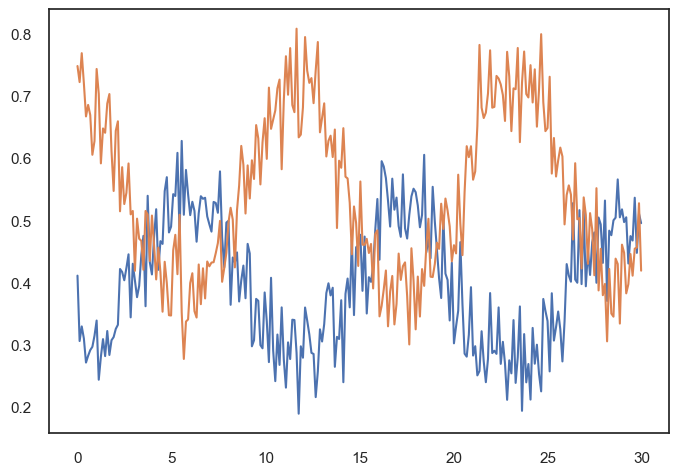

In [11]:
from matplotlib import pyplot as plt
plt.rcParams['font.family'] = 'Arial'
dataset = SyntheticPV(num_discrete=8)
plt.plot(dataset.times, dataset.pv, label='PV')
plt.plot(dataset.times, dataset.cloud, label='Cloud')

In [12]:
from gpytorch.means import ZeroMean
from gpytorch.kernels import ScaleKernel, RBFKernel
from gpytorch.likelihoods import GaussianLikelihood
from alfi.configuration import VariationalConfiguration

num_outputs = 1
gp_config = {
    'type' : 'stochastic',
    'name' : 'cholesky',
    'jitter' : 1e-6,
}
gp_model = ApproximateGP(dataset=dataset,
                         mean=ZeroMean(),
                         covar=ScaleKernel(RBFKernel()),
                         likelihood=GaussianLikelihood(),
                         config=gp_config)

lfm = ApproximatePVLFM(dataset=dataset,
                       num_outputs=num_outputs,
                       gp_model=gp_model,
                       config=VariationalConfiguration(num_samples=70))

In [13]:
lfm.fit(n_iter=150, lr=0.2)

Iter 10/150, Loss: 0.35557973731815673
Iter 20/150, Loss: -0.7562527976550942
Iter 30/150, Loss: -1.084657397089829
Iter 40/150, Loss: -1.1548574545833759
Iter 50/150, Loss: -1.1885652705237262
Iter 60/150, Loss: -1.2094906168272106
Iter 70/150, Loss: -1.206035215111719
Iter 80/150, Loss: -1.2147721482440315
Iter 90/150, Loss: -1.219097374668573
Iter 100/150, Loss: -1.2237356088795224
Iter 110/150, Loss: -1.2281501921379037
Iter 120/150, Loss: -1.2298745717388089
Iter 130/150, Loss: -1.2275957955819323
Iter 140/150, Loss: -1.2282041259221523
Iter 150/150, Loss: -1.2292305722160302


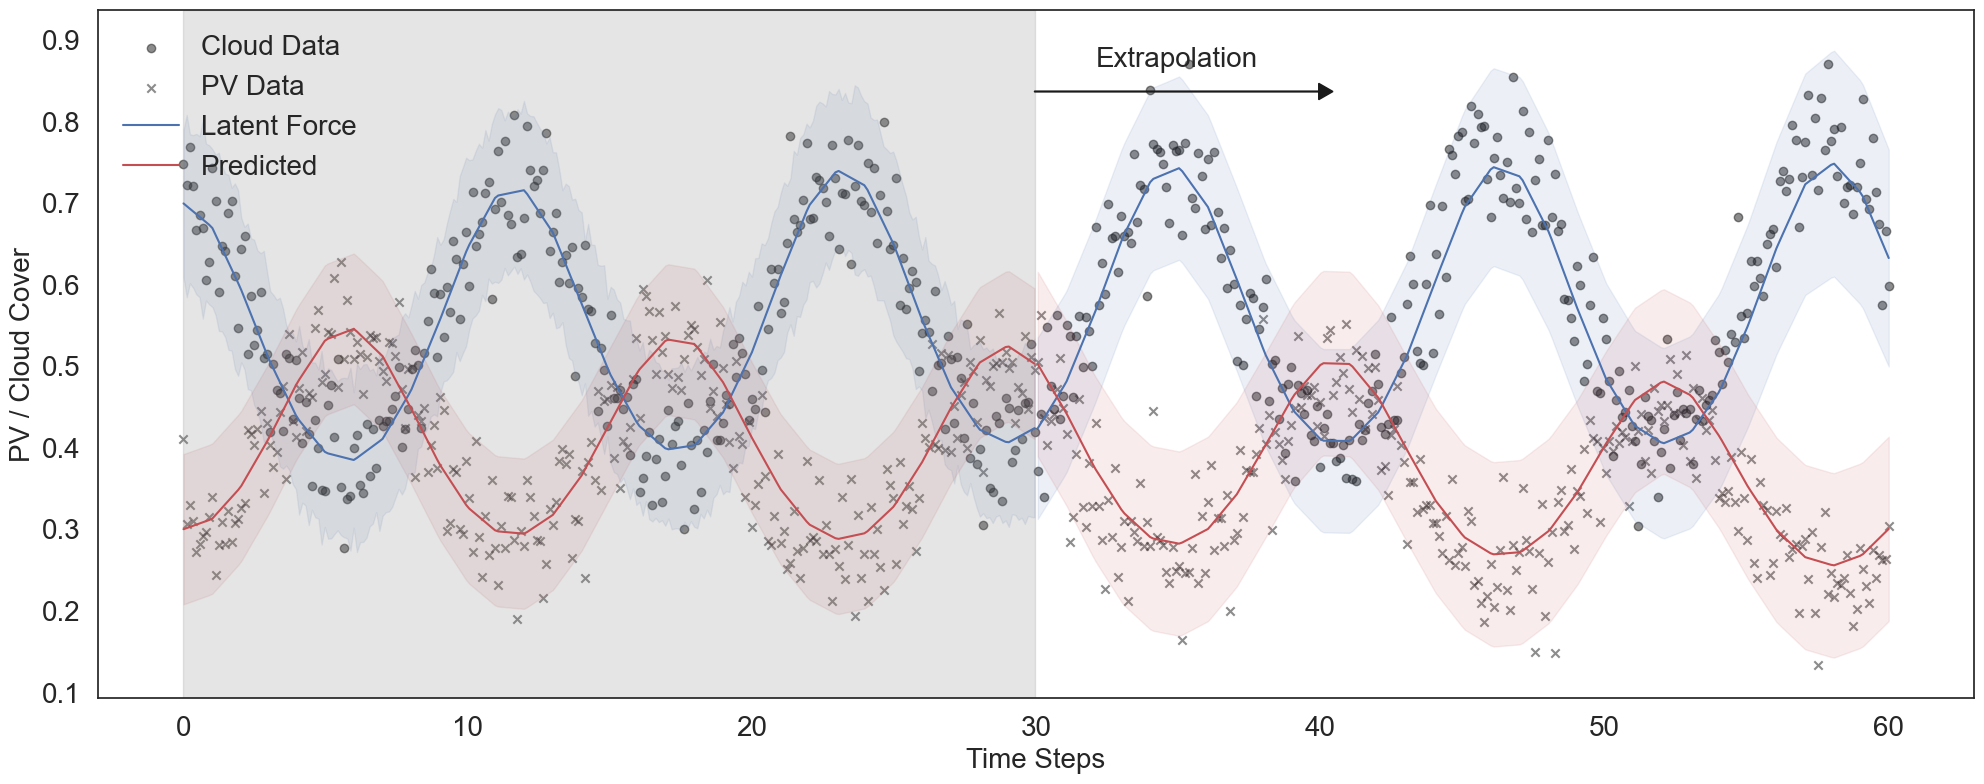

In [14]:
plot_lfm(lfm, dataset)

In [15]:
print_lfm_param_table(lfm, dataset)

--------------------------------------------------
| Parameter  	 | True 	 |  Learned 	 |
--------------------------------------------------
|  a 		 |  0.003 	 | 0.001 	 |
--------------------------------------------------
|  b 		 |  0.174 	 | 0.167 	 |
--------------------------------------------------
|  c 		 |  0.173 	 | 0.173 	 |
--------------------------------------------------
